# Laboratorio 4 - Pregunta 3
### Hecho por: Daniel Alonso, Álvaro García Cid, Enrique Ramos e Ignacio Regidor

#Introducción al problema y pasos previos
A continuación se muestrán las librerías de Python utilizadas en esta práctica.
- Numpy: utilizada por el resto de liberías, permite la creación y el manejo de datos de forma rápida y eficiente, conteniendo estructuras de datos propias.
- Pandas: permite la creación y manejo de dataframes a partir de la base de datos empleada.
- Matplotlib.pyplot: se utilizará para graficar los distintos diagramas que permitan el estudio de los datos de forma visual.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram

# Preprocesamiento de los datos

Descargamos los datos para comenzar a trabajar con ellos

In [11]:
datos = pd.read_csv("enfermeria.csv", encoding='latin-1')
datos

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [12]:
for c in datos.columns:
  print("Missing Values [{0}]:".format(c), datos[c].isna().sum())

Missing Values [parents_occupation]: 0
Missing Values [childs_nursery]: 0
Missing Values [family_form]: 0
Missing Values [number_children]: 0
Missing Values [housing_conditions]: 0
Missing Values [financial_standing]: 0
Missing Values [social_conditions]: 0
Missing Values [health_conditions]: 0
Missing Values [recommendation]: 0


In [13]:
labelencoder=LabelEncoder()
for column in datos.columns:
  datos[column]=labelencoder.fit_transform(datos[column])
datos

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [23]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(datos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 5], dtype=int32)

In [25]:
Z = linkage(kmeans.cluster_centers_, method='ward')

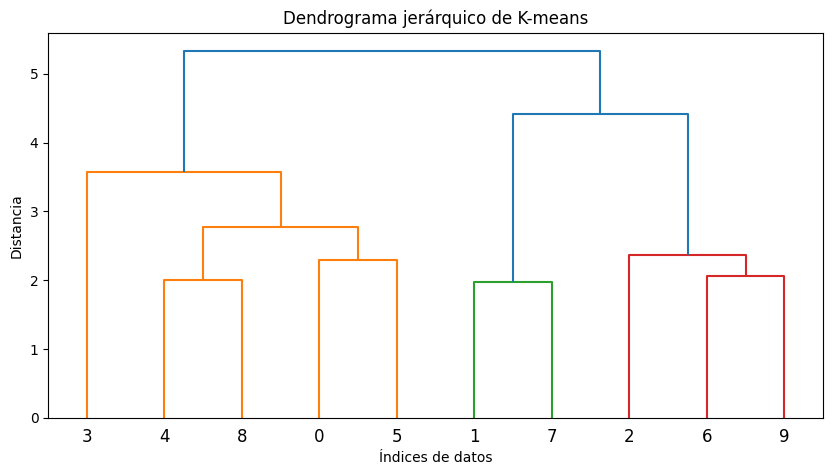

In [26]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma jerárquico de K-means')
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()

In [28]:
datos['grupo']=kmeans.labels_
datos

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation,grupo
0,2,3,0,0,0,0,0,2,2,0
1,2,3,0,0,0,0,0,1,1,0
2,2,3,0,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2,0
4,2,3,0,0,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3,3
12956,0,4,2,3,1,1,2,0,0,5
12957,0,4,2,3,1,1,1,2,3,3
12958,0,4,2,3,1,1,1,1,3,3


In [29]:
datos1= datos.loc[(datos['grupo'] == 0)]
datos1

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation,grupo
0,2,3,0,0,0,0,0,2,2,0
1,2,3,0,0,0,0,0,1,1,0
2,2,3,0,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2,0
4,2,3,0,0,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
12413,0,4,1,1,1,1,0,0,0,0
12416,0,4,1,1,1,1,2,0,0,0
12419,0,4,1,1,1,1,1,0,0,0
12744,0,4,2,0,0,0,0,2,1,0


In [21]:
datos.dtypes

parents_occupation    int64
childs_nursery        int64
family_form           int64
number_children       int64
housing_conditions    int64
financial_standing    int64
social_conditions     int64
health_conditions     int64
recommendation        int64
dtype: object

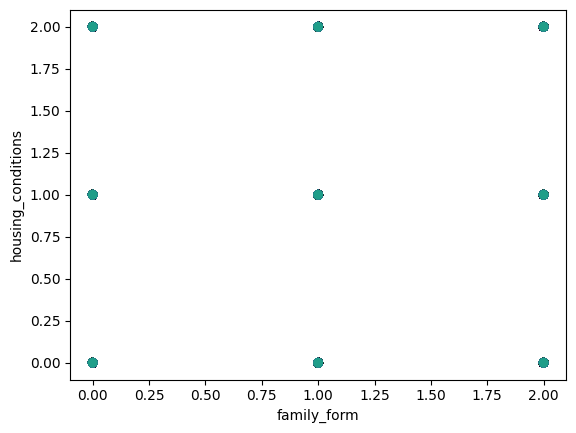

In [32]:
import matplotlib.pyplot as plt
plt.scatter(datos['housing_conditions'], datos['parents_occupation'] , c=kmeans.labels_)
plt.xlabel('family_form')
plt.ylabel('housing_conditions')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(datos)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
